In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import cv2

import torchvision.transforms as transforms
import torch
from torch.autograd import Variable

In [2]:
from pathlib import Path

model_dir = Path("../saved_models/")
data_dir = Path("../")
test_dir = Path('../test/imgs')

## Loading Pretrained Model with Weights

In [3]:
from model import CancerDetector

In [4]:
model = CancerDetector()

In [5]:
# Load Best parameters learned from training into our model to make predictions later
model.load_state_dict(torch.load(model_dir/'best_model.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

## Making Inference on All Scan Images in Test Set

In [6]:
all_imgs = os.listdir(test_dir)

In [7]:
# from predict import predict
# import cv2
# img_path = os.path.join(test_dir, all_imgs[0])
# img = cv2.imread(img_path)
# predict(img)

In [8]:
test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [9]:
def predict_image(image):
    model.eval()
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to('cpu')
    output = model(input)
    chance = np.round(output.data.cpu().numpy()[0][0]*100, 2)
    return chance

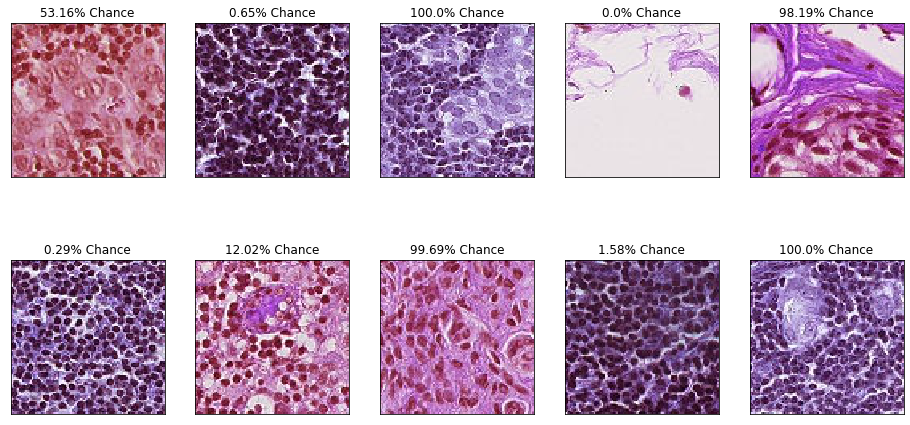

In [10]:
fig = plt.figure(figsize=(16, 8))
# display 20 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    img_path = os.path.join(test_dir, all_imgs[idx])
    img = cv2.imread(img_path)
    plt.imshow(img)
    out = predict_image(img)
    prob = f"{out}% Chance"
    ax.set_title('{}'.format(prob))